In [45]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio import pairwise2
from Bio import Entrez
import numpy as np
import matplotlib.pyplot as plt
import random

Entrez.email = 'adam.jasinski@mif.stud.vu.lt'

id = 'NZ_CP011070.1'

In [5]:
file = open("sequence.fasta", "w")

handle = Entrez.efetch(db="nuccore", id=id, rettype="fasta", retmode="text")
record = handle.read()
file.write(record)
file.close()

CODE  DESCRIPTION
x     No parameters. Identical characters have score of 1, else 0.
m     A match score is the score of identical chars, else mismatch
      score.
d     A dictionary returns the score of any pair of characters.
c     A callback function returns scores.

CODE  DESCRIPTION
x     No gap penalties.
s     Same open and extend gap penalties for both sequences.
d     The sequences have different open and extend gap penalties.
c     A callback function returns the gap penalties.

In [51]:
seq = ''

for record in SeqIO.parse("sequence.fasta", "fasta"):
    seq = record.seq
    
fragmentStart = random.randint(0, len(seq)-2000)
fragmentT = seq[fragmentStart:fragmentStart+2000]

randomFragments = []

while len(randomFragments) < 10000:
    randomFragmentStart = random.randint(0, len(seq)-100)
    if randomFragmentStart > fragmentStart and randomFragmentStart < fragmentStart + 2000 or randomFragmentStart + 100 > fragmentStart and randomFragmentStart + 100 < fragmentStart + 2000:
        continue
    
    randomFragments.append(seq[randomFragmentStart:randomFragmentStart+100])


scores = []
for i, seq in enumerate(randomFragments):
    alignmentScore = pairwise2.align.localms(seq,fragmentT, 5, -4, -5, 0, score_only=True)
    scores.append(round(alignmentScore))


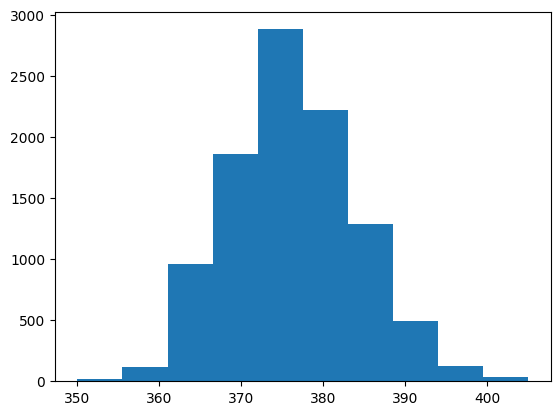

In [52]:
_ = plt.hist(scores)